   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

C:\Users\Admin\AppData\Local\Temp\ipykernel_16004\1642683319.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16004\1642683319.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Accuracy: 0.8268156424581006

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
 [[90 15]
 [16 58]]


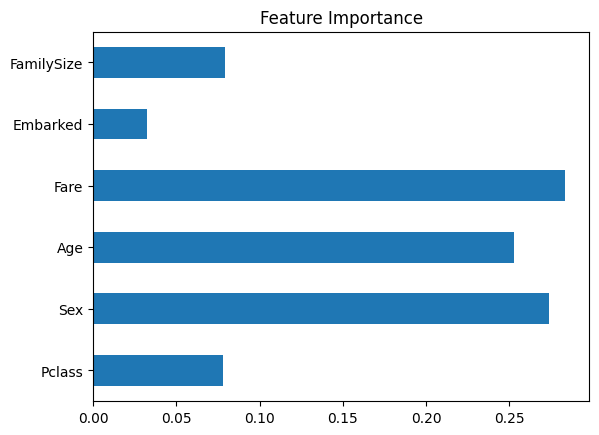

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Explore the first few rows of the dataset
print(titanic_df.head())

# Check for missing values
print(titanic_df.isnull().sum())

# Handle missing values
# Fill missing Age values with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing Embarked values with the most frequent value
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column since it has a lot of missing values
titanic_df.drop('Cabin', axis=1, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

# Feature engineering
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Select features and target variable
X = titanic_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
y = titanic_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.show()


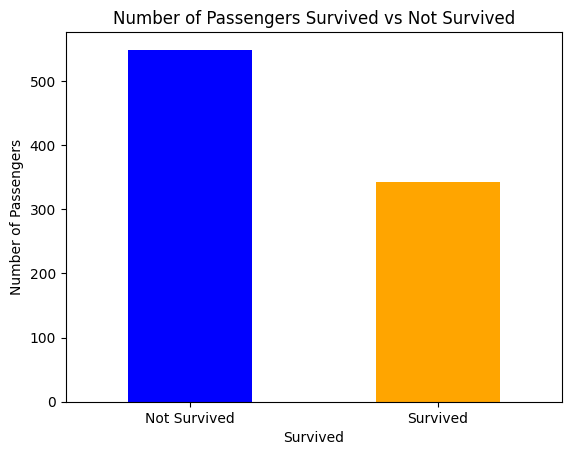

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Handle missing values
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Drop the Cabin column since it has a lot of missing values
titanic_df = titanic_df.drop('Cabin', axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])

# Feature engineering
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Plot the number of passengers who survived and those who did not
survival_counts = titanic_df['Survived'].value_counts()
survival_counts.plot(kind='bar', color=['blue', 'orange'])

# Set plot labels and title
plt.xlabel('Survived')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Survived vs Not Survived')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'], rotation=0)
plt.show()


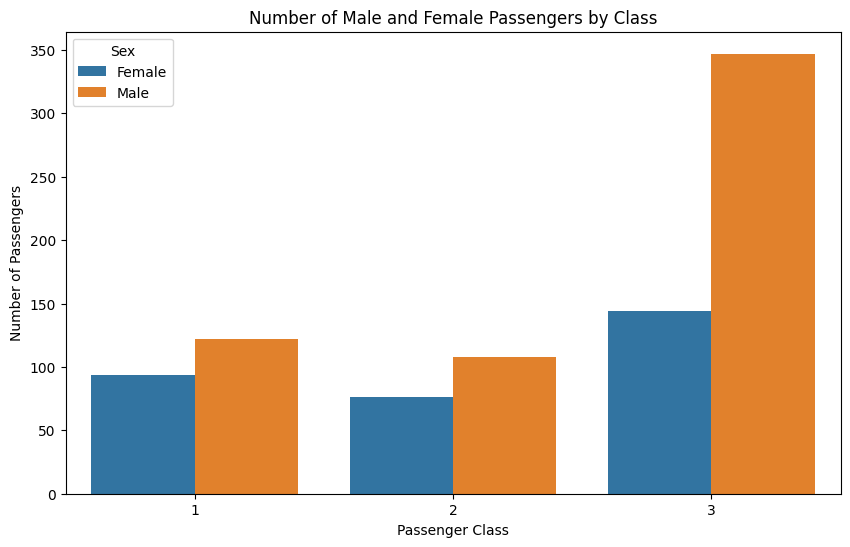

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Handle missing values
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

# Drop the Cabin column since it has a lot of missing values
titanic_df = titanic_df.drop('Cabin', axis=1)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])  # 1 for male, 0 for female

# Convert the 'Sex' column back to categorical for better readability in the plot
titanic_df['Sex'] = titanic_df['Sex'].map({1: 'Male', 0: 'Female'})

# Plot the number of male and female passengers by class
plt.figure(figsize=(10, 6))
sns.countplot(data=titanic_df, x='Pclass', hue='Sex')

# Set plot labels and title
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Male and Female Passengers by Class')
plt.legend(title='Sex')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9736\3145444139.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9736\3145444139.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

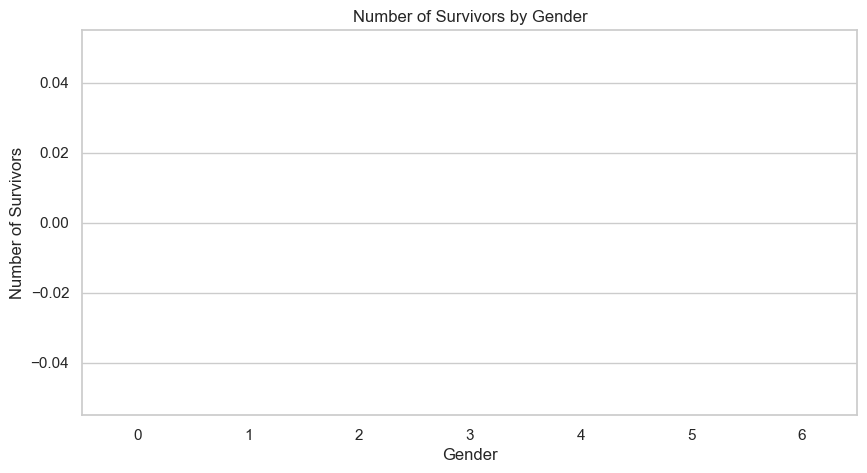

C:\Users\Admin\AppData\Local\Temp\ipykernel_9736\3145444139.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SibSp', y='Survived', data=survivors_by_sibsp, palette='viridis')


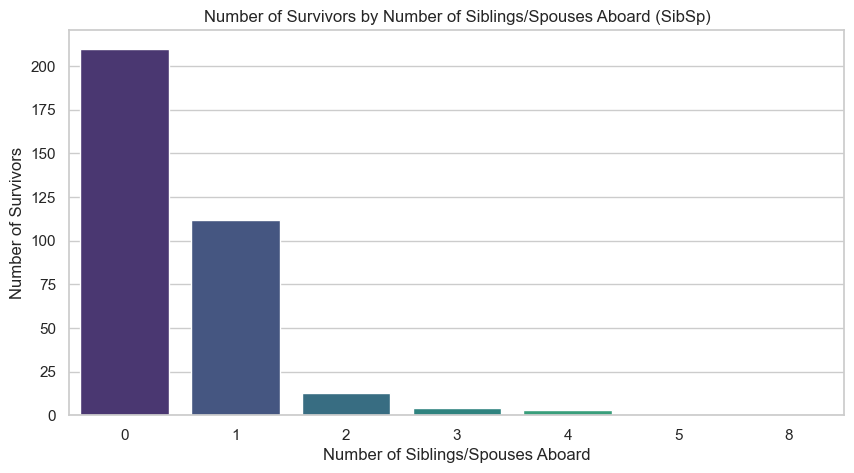

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('titanic.csv')

# Data preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df.drop(columns='Cabin', inplace=True)

# Calculate the number of survivors by gender
survivors_by_gender = df.groupby('Sex')['Survived'].sum().reset_index()
survivors_by_gender['Sex'] = survivors_by_gender['Sex'].map({0: 'male', 1: 'female'})

# Calculate the number of survivors by number of siblings/spouses aboard (SibSp)
survivors_by_sibsp = df.groupby('SibSp')['Survived'].sum().reset_index()

# Set the style of the plots
sns.set(style="whitegrid")

# Create a bar plot for number of survivors by gender
plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Survived', data=survivors_by_gender, palette='viridis')
plt.title('Number of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.show()

# Create a bar plot for number of survivors by number of siblings/spouses aboard (SibSp)
plt.figure(figsize=(10, 5))
sns.barplot(x='SibSp', y='Survived', data=survivors_by_sibsp, palette='viridis')
plt.title('Number of Survivors by Number of Siblings/Spouses Aboard (SibSp)')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Number of Survivors')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9736\3343077629.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9736\3343077629.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

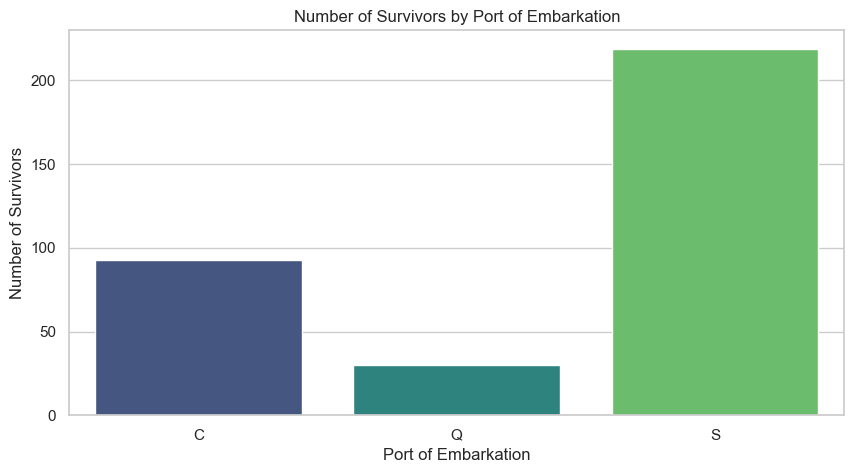

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('titanic.csv')

# Data preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df.drop(columns='Cabin', inplace=True)

# Calculate the number of survivors by port of embarkation
survivors_by_embarked = df.groupby('Embarked')['Survived'].sum().reset_index()

# Set the style of the plots
sns.set(style="whitegrid")

# Create a bar plot for number of survivors by port of embarkation
plt.figure(figsize=(10, 5))
sns.barplot(x='Embarked', y='Survived', data=survivors_by_embarked, palette='viridis')
plt.title('Number of Survivors by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Survivors')
plt.show()
